In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df =pd.read_pickle('top100comunio.pckle')

In [3]:
df

Rang       Spieler  Club    Position  Marktwert Einsätze(bewertet)  Tore  \
0     1.0   Lewandowski   NaN       Sturm   27460000            11 (11)    13   
1     2.0       Kimmich   NaN  Mittelfeld   17980000            11 (11)     3   
2     3.0       Haaland   NaN       Sturm   24350000              6 (6)     9   
3     4.0       Modeste   NaN       Sturm   18440000            11 (11)     8   
4     5.0     T. Müller   NaN       Sturm   21780000            11 (11)     4   
..    ...           ...   ...         ...        ...                ...   ...   
95   96.0  Bruun Larsen   NaN       Sturm    3950000            11 (10)     3   
96   96.0       A. Hack   NaN      Abwehr    4510000              8 (8)     0   
97   96.0        Schöpf   NaN  Mittelfeld    3480000            10 (10)     0   
98   96.0         Trapp   NaN     Torwart    2500000            11 (11)     0   
99  100.0        Brooks   NaN      Abwehr    4730000            10 (10)     0   

    Punkte  Punkte pro Spiel  Einsätze  
0      101          9.181818        11  
1       85          7.727273        11  
2       82         13.666667         6  
3       80          7.272727        11  
4       76          6.909091        11  
..     ...               ...       ...  
95      29          2.900000        10  
96      29          3.625000         8  
97      29          2.900000        10  
98      29          2.636364        11  
99      28          2.800000        10  

[100 rows x 10 columns]

In [4]:
## Ausführen

X=df[["Tore","Punkte","Einsätze"]]
y=df['Marktwert']

from sklearn.ensemble import RandomForestRegressor
ranForest= RandomForestRegressor(n_estimators=10,random_state=0)
ranForest.fit(X,y)

RandomForestRegressor(n_estimators=10, random_state=0)

In [5]:
## Ausprobieren 
valData=[[1,46,10]]
ranForest.predict(valData)

array([12258000.])

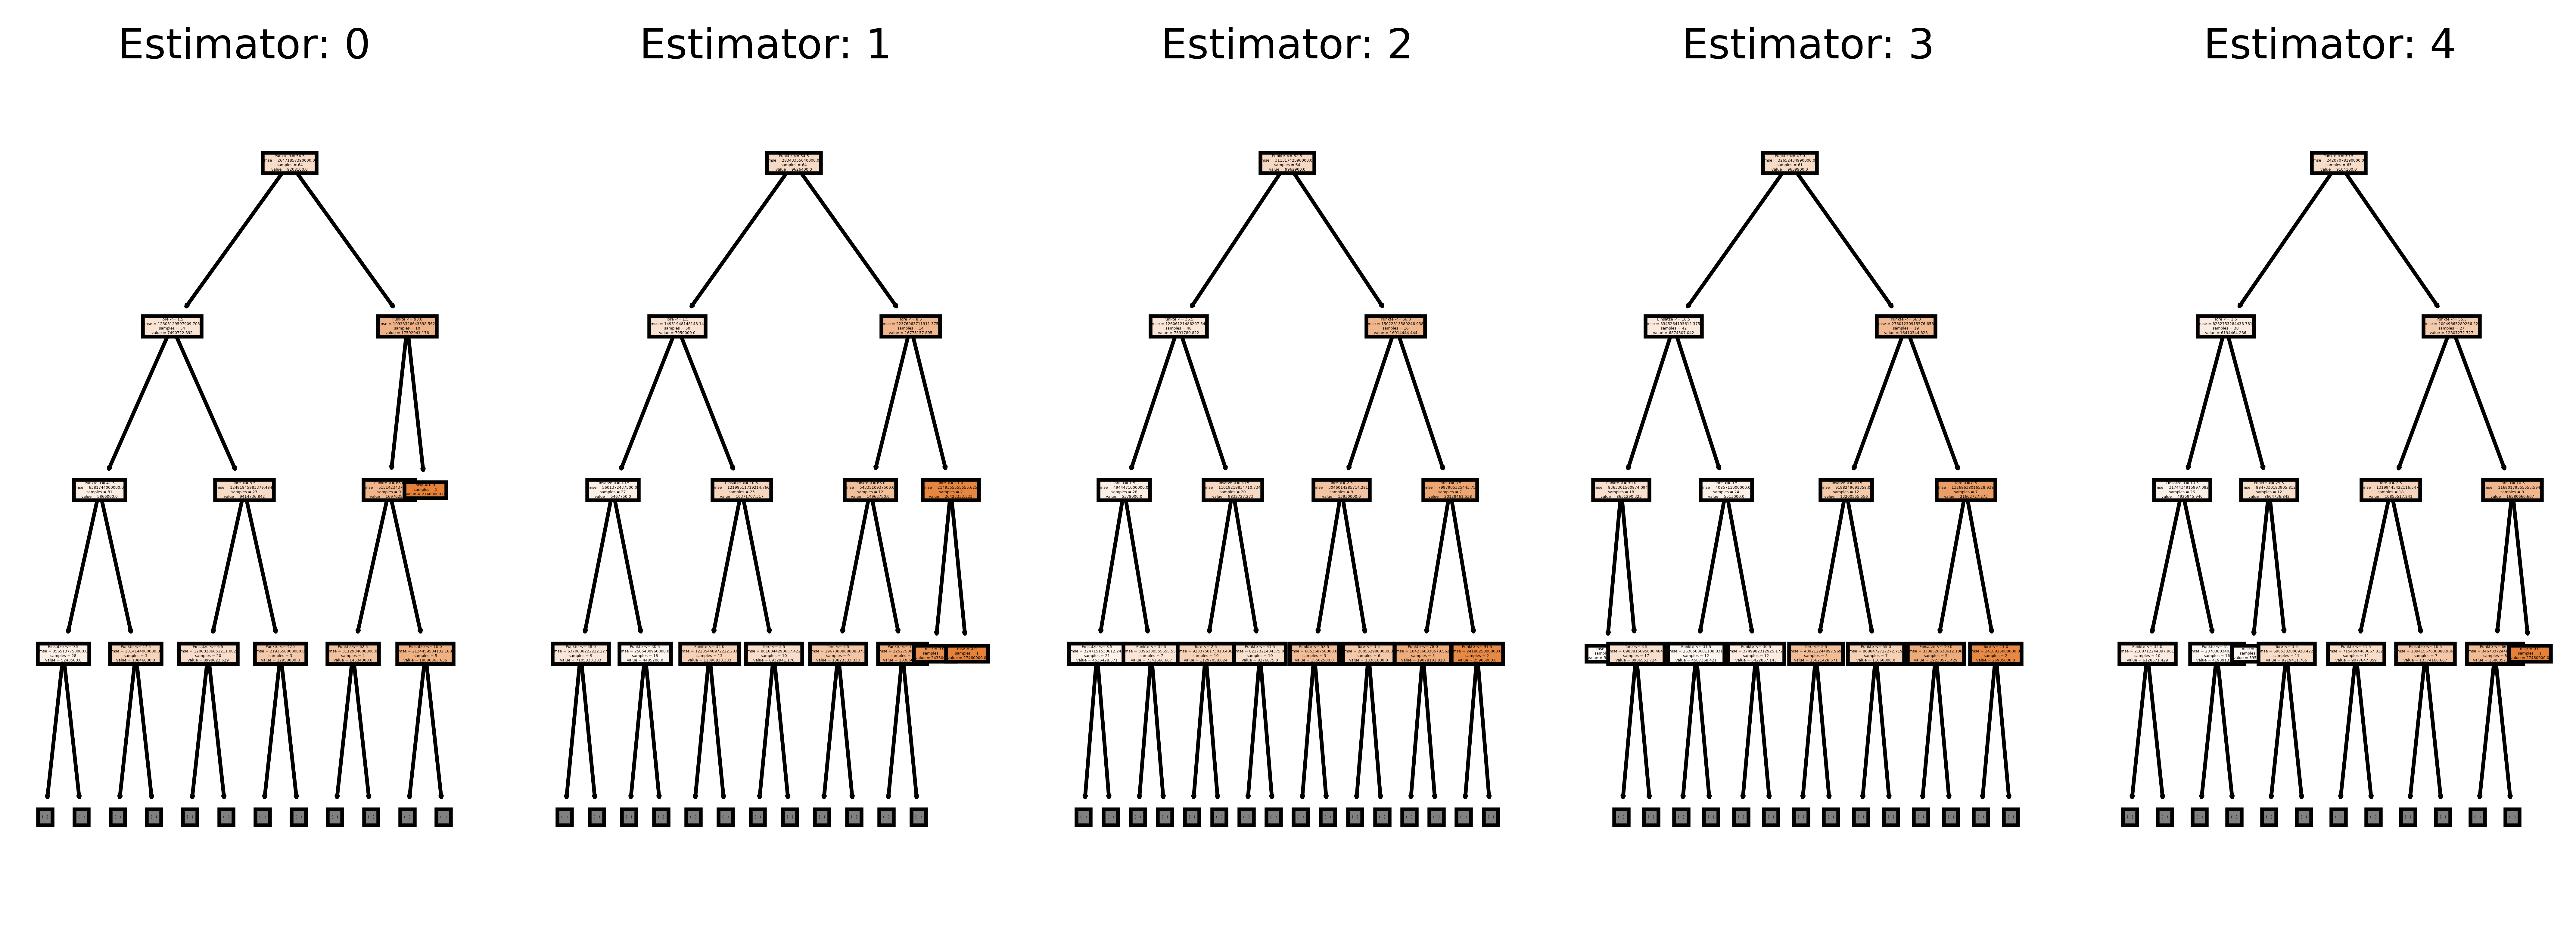

In [6]:
## Visualisierung
from sklearn import tree
fn=["Tore","Punkte","Einsätze"]
cn=["Marktwert"]

fig, axes = plt.subplots(nrows = 1,ncols = 5,figsize = (12,4), dpi=900)
for index in range(0, 5):
    tree.plot_tree(ranForest.estimators_[index],
                   feature_names = fn, 
                   class_names=cn,
                   filled = True,
                   max_depth =3,
                   ax = axes[index]);

    axes[index].set_title('Estimator: ' + str(index), fontsize = 11)
fig.savefig('rf_example.png')